<a href="https://colab.research.google.com/github/ultraSmartAry/MLCollege/blob/master/mask_tracker_workshop_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import cv2


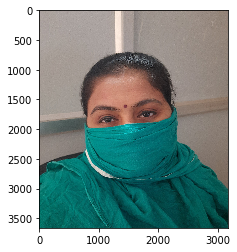

In [ ]:
img=image.load_img("C:/Users/Administrator.LAPTOP-VJL3GOD6/Documents/Day-2-Deep Learning/base/train/With_Mask/1.jpg")

plt.imshow(img)

In [ ]:
cv2.imread('C:/Users/Administrator.LAPTOP-VJL3GOD6/Documents/Day-2-Deep Learning/base/train/With_Mask/1.jpg',0)

array([[151, 157, 163, ..., 108, 142, 144],
       [158, 161, 165, ..., 112, 138, 141],
       [163, 165, 166, ..., 114, 133, 133],
       ...,
       [ 64,  63,  64, ...,  51,  54,  51],
       [ 80,  77,  68, ...,  51,  54,  49],
       [ 96,  92,  79, ...,  50,  53,  53]], dtype=uint8)

In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset=train.flow_from_directory('C:/Users/Administrator.LAPTOP-VJL3GOD6/Documents/Day-2-Deep Learning/base/train',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')

Found 40 images belonging to 2 classes.


In [ ]:
validation_dataset=train.flow_from_directory('C:/Users/Administrator.LAPTOP-VJL3GOD6/Documents/Day-2-Deep Learning/base/validation',
                                             target_size=(200,200),
                                             batch_size=3,
                                             class_mode='binary')

Found 10 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'With_Mask': 0, 'Without_Mask': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  
                                                                   
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  
                                  tf.keras.layers.MaxPool2D(2,2),
                                  
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  
                                  tf.keras.layers.MaxPool2D(2,2),
                                  
                                  tf.keras.layers.Flatten(),
                                  
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  
                                  tf.keras.layers.Dense(1,activation='sigmoid')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 32)      4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 147456)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               7

In [ ]:
model.compile(loss='binary_crossentropy',optimizer= RMSprop(lr=0.001),metrics=['accuracy'])

In [ ]:
model.fit(train_dataset,steps_per_epoch=3,epochs=30,validation_data=validation_dataset)

Epoch 1/30
3/3 [==============================] - 79s 26s/step - loss: 18.4438 - accuracy: 0.2857 - val_loss: 0.8544 - val_accuracy: 0.50007    
Epoch 2/30
3/3 [==============================] - 27s 9s/step - loss: 0.9491 - accuracy: 0.6667 - val_loss: 0.8367 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 15s 5s/step - loss: 1.0067 - accuracy: 0.2222 - val_loss: 1.1560 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 15s 5s/step - loss: 0.6371 - accuracy: 0.7778 - val_loss: 1.8327 - val_accuracy: 0.4000
Epoch 5/30
3/3 [==============================] - 15s 5s/step - loss: 1.1167 - accuracy: 0.5556 - val_loss: 0.6945 - val_accuracy: 0.6000
Epoch 6/30
3/3 [==============================] - 13s 4s/step - loss: 0.6789 - accuracy: 0.5714 - val_loss: 0.7020 - val_accuracy: 0.6000
Epoch 7/30
3/3 [==============================] - 14s 5s/step - loss: 0.5602 - accuracy: 0.8889 - val_loss: 0.4578 - val_accuracy: 0.7000
Epoch 8/30
3/3 [===========

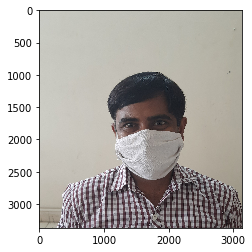

In [ ]:
new_image = plt.imread("C:/Users/Administrator.LAPTOP-VJL3GOD6/Documents/Day-2-Deep Learning/base/test/8.jpg")
img = plt.imshow(new_image)

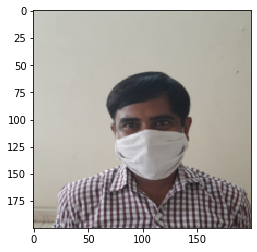

In [ ]:
from skimage.transform import resize
resized_image = resize(new_image, (200,200))
img = plt.imshow(resized_image)

In [ ]:
predictions = model.predict(np.array( [resized_image] ))
predictions

array([[0.38113022]], dtype=float32)

In [ ]:
val=predictions.round()
val

array([[0.]], dtype=float32)

In [ ]:
if val==0:
  print("with mask")
else:
    print("without mask")

with mask
